# NYS-Motor-Vehicle-Crashes

A small Udacity student project looking at vehicle crash data for the state of New York

In [917]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [918]:
%matplotlib inline


### About the dataset:
- The dataset consist of 1.65 million rows accross 19 columns. The columns describe traffic accidents, one per row, taking place in the state of New York. The dataset is hosted by the State of New York through an open data platform here: https://data.ny.gov/ This dataset in particular was found on the Kaggle-website.

Data, column descriptions as well as a general description of the dataset can be found here:
https://www.kaggle.com/new-york-state/nys-motor-vehicle-crashes-and-insurance-reduction



# Business questions

This dataset holds interesting data about accidents in the State of New York, and I'd like to focus on what we can find by using data about "Vehicle Makes" and "Action prior to Accident".

Questions:
- Whats the most common "Action prior to accident"?
- Can we say anything about car make and accidents happening after Police Pursuits?
- Can we find any support for the rumors about BMW drivers not using blinkers?
- Do these data from the State of New York have the necessary quality to be used for analysis of traffic accidents?


# Gather data

In [919]:

df = pd.read_csv('./motor-vehicle-crashes-vehicle-information-three-year-window.csv')
df.head()

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2016,13364291,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,Not Entered,West,Gas,2012.0,NY,1.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,WMWZC3C57CWL81108
1,2016,13364304,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2014.0,NY,2.0,6.0,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,3GCUKREH8EG196335
2,2016,13364305,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2007.0,NY,1.0,4.0,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,1HGCM56387A220086
3,2016,13364307,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2011.0,NY,4.0,4.0,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,2CNFLCEC1B6362978
4,2016,13364306,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2004.0,NY,1.0,6.0,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",3G5DA03E04S597761


# Assess the data



In [920]:
print(df.shape)

(1654482, 19)


In [921]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654482 entries, 0 to 1654481
Data columns (total 19 columns):
Year                                 1654482 non-null int64
Case Vehicle ID                      1654482 non-null int64
Vehicle Body Type                    1654482 non-null object
Registration Class                   1654482 non-null object
Action Prior to Accident             1654482 non-null object
Type / Axles of Truck or Bus         1654482 non-null object
Direction of Travel                  1654482 non-null object
Fuel Type                            1654482 non-null object
Vehicle Year                         1395981 non-null float64
State of Registration                1518575 non-null object
Number of Occupants                  1462721 non-null float64
Engine Cylinders                     1308677 non-null float64
Vehicle Make                         1397370 non-null object
Contributing Factor 1                1654453 non-null object
Contributing Factor 1 Descriptio

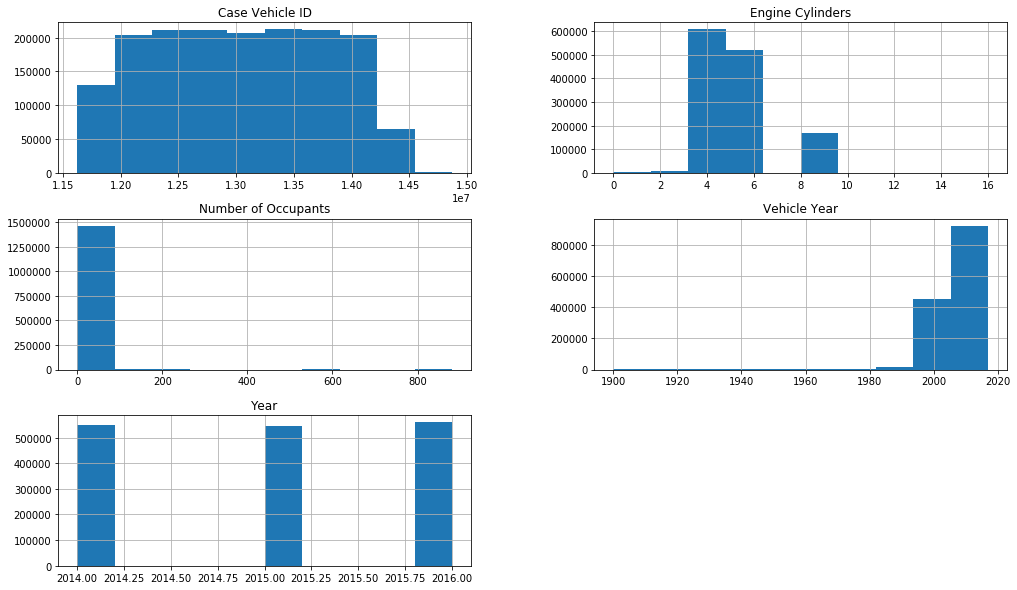

In [922]:
df.hist(figsize=(17,10));

### Comments
From the above, we see that there are just a few nummerical columns.

**TODO:** 
* Column "Case Vehicle ID" can be dropped as it is a reference we cannot use for interpretation.
* Column "Partial VIN" can be dropped as it has a random nature and cannot be used for interpretation

In [923]:
df.nunique()

Year                                       3
Case Vehicle ID                      1654468
Vehicle Body Type                         65
Registration Class                        70
Action Prior to Accident                  22
Type / Axles of Truck or Bus              23
Direction of Travel                       11
Fuel Type                                 10
Vehicle Year                             104
State of Registration                     82
Number of Occupants                       76
Engine Cylinders                          16
Vehicle Make                            2095
Contributing Factor 1                      3
Contributing Factor 1 Description         57
Contributing Factor 2                      3
Contributing Factor 2 Description         57
Event Type                                35
Partial VIN                          1266553
dtype: int64

### Comments
Most of the columns in this dataset are categorical columns


In [924]:
# Evaluating NaN values in the different columns
df.isnull().sum()

Year                                      0
Case Vehicle ID                           0
Vehicle Body Type                         0
Registration Class                        0
Action Prior to Accident                  0
Type / Axles of Truck or Bus              0
Direction of Travel                       0
Fuel Type                                 0
Vehicle Year                         258501
State of Registration                135907
Number of Occupants                  191761
Engine Cylinders                     345805
Vehicle Make                         257112
Contributing Factor 1                    29
Contributing Factor 1 Description        29
Contributing Factor 2                    28
Contributing Factor 2 Description        28
Event Type                            31436
Partial VIN                          298095
dtype: int64

### Comments
There are quite a few rows witn NaN-data in, but before removing these, we should decide if there are more columns that we can drop.

**TODO:**
* Column "Engine Cylinders" can be dropped as it has a lot of NaN rows and also we do not see any use for this data just now.
* Column "Fuel Type" can be dropped as we do not see any use of these now


In [925]:
# Calculating number of columns with different values
pct_NotApplicatble = round(df[(df["Event Type"] == "Not Applicable")]['Event Type'].value_counts().sum()/df.shape[0]*100,2)
pct_NotEntered = round(df[(df["Event Type"] == "Not Entered")]['Event Type'].value_counts().sum()/df.shape[0]*100,2)
pct_NaN = round(df["Event Type"].isnull().sum()/df.shape[0]*100,2)

print("Pct of columns with Event Types -Not Applicable- is: {}%".format(pct_NotApplicatble))
print("Pct of columns with Event Types -Not Entered- is: {}%".format(pct_NotEntered))
print("Pct of columns with Event Types NaN is: {}%".format(pct_NaN))


event_type_df = pd.DataFrame(df[(df["Event Type"] != "Not Applicable") & (df["Event Type"] != "Not Entered")]['Event Type'].value_counts().sort_values(ascending=False).copy())
event_type_df.reset_index(inplace=True)
event_type_df.columns = ["Event Type","Count"]
event_type_df["percentage"] = event_type_df.apply(lambda row: row["Count"]/df.shape[0]*100, axis=1)

print("Pct of columns with an Event Type recorded: {}%".format(round(event_type_df["percentage"].sum(),2)))
event_type_df.head()


Pct of columns with Event Types -Not Applicable- is: 52.99%
Pct of columns with Event Types -Not Entered- is: 35.55%
Pct of columns with Event Types NaN is: 1.9%
Pct of columns with an Event Type recorded: 9.56%


,Event Type,Count,percentage
0,"Other Motor Vehicle, Collision With",77257,4.669558
1,"Tree, Collision With Fixed Object",9578,0.578912
2,"Earth Embankment/Rock Cut/Ditch, Collision Wit...",7912,0.478216
3,"Guide Rail - Not At End, Collision With Fixed ...",7485,0.452407
4,"Light Support/Utility Pole, Collision With Fix...",7246,0.437962


### Comments
We see that the column "Event Type" is providing valuable information for less than 10% of the rows, and therefore this can be deleted. We also have other columns with name "Contributing Factor..." that can be used to describe the events.
** TODO:
* Drop column "Event Type"

### Cleaning


Drop columns: 
* "Case Vehicle ID"
* "Partial VIN"
* "Engine Cylinders"
* "Fuel Type" 
* "Event Type"


In [926]:
# Clean data
def drop_columns(p_df):
    """Drop columns that are not needed or not to be used in the analysis to come"""
    p_df = p_df.drop("Case Vehicle ID", axis=1)
    p_df = p_df.drop("Partial VIN", axis=1)
    p_df = p_df.drop("Engine Cylinders", axis=1)
    p_df = p_df.drop("Fuel Type", axis=1)
    p_df = p_df.drop("Event Type", axis=1)

    return p_df

In [927]:
df1 = drop_columns(df)

In [928]:
#Confirming the shape of the new DataFrame:
df1.shape

(1654482, 14)

In [ ]:
# Checking the number of unique values in each column
df1.nunique()

In [ ]:
df1.isnull().sum()

### Doing some more assessment
Plan is to take a look at some of the most popular types of vehicles, and we should check of the "Vehicle Make" is coded correctly. First thing then is to get rid of the NaN values in this column, and we then choose to code these as "unknown":

In [ ]:
# Counting the number of accidents grouped by Vehicle Make, sorting them and then picking the 30 most common makes.
acci_vehi_top30 = df1.groupby(['Vehicle Make']).size().reset_index(name='counts').sort_values(by="counts", ascending=False)[0:30].sum()


print("30 most common vehicle makes account for {}% of all accidents".format(round(acci_vehi_top30.counts / df1.shape[0] * 100, 2)))



In [ ]:
# Replacing NaN-values in the column "Vehicle Make":

df1["Vehicle Make"].fillna(df1["Vehicle Make"].replace(np.nan, "unknown"), inplace=True)


In [ ]:
def clean_vehicle_codes( dataframe, synonyms, correct_vehicle_make ):
    """Replace vehicle synonyms with the one correct vehicle make, then return updated DataFrame"""
    for synonym in synonyms:
        dataframe['Vehicle Make'].replace(synonym, correct_vehicle_make, inplace=True)
    return dataframe

In [ ]:
#Making a check for TOYOTA:
df1[df1["Vehicle Make"].str.contains("TOY")]["Vehicle Make"].unique()

In [ ]:
#Cleaning data for TOYOTA:
TOYOTA_synonyms = ('TOYOT', 'TOYT', 'TOYO', 'TOYTO', 'TOYOR', 'TOYOTA', 'TOYP', 'TOYOY', 'TOYUO', 'TOY', 'TOY.', 'TOYOA', 'TOYTA', 'TOYOZ')
df1 = clean_vehicle_codes( df1, TOYOTA_synonyms, 'TOYOTA' )

In [ ]:
#Making a check for BMW:
df1[df1["Vehicle Make"].str.contains("BMW")]["Vehicle Make"].unique()


In [ ]:
#Cleaning data for BMW:
BMW_synonyms = ('BMW', 'BMWV', 'BMWNA')

df1 = clean_vehicle_codes( df1, BMW_synonyms, 'BMW' )
    

In [ ]:
#Making a check for AUDI => Audi is ok:
df1[df1["Vehicle Make"].str.contains("AUD")]["Vehicle Make"].unique()

In [ ]:
#Making a check for CHEVROLET:
df1[df1["Vehicle Make"].str.contains("CHEV")]["Vehicle Make"].unique()

In [ ]:
#Cleaning data for Chevrolet:
CHEVR_synonyms = ('CHEVR', 'CHEV', 'CHEVY', 'CHEVE', 'CHEVF', 'CHEVT')
df1 = clean_vehicle_codes( df1, CHEVR_synonyms, 'CHEVR' )


In [ ]:
#Making a check for Ford:
df1[df1["Vehicle Make"].str.contains("ORD")]["Vehicle Make"].unique()

In [ ]:
#Cleaning data for Ford:
FORD_synonyms = ('FORD', 'RORD', 'FORDV', 'FORDT', 'FORDG', 'FORDF', 'FORDQ', 'FORDP', 
             'FRORD', 'FORDS', 'MORD', 'DORD', 'FORDU', 'FORDD')

df1 = clean_vehicle_codes( df1, FORD_synonyms, 'FORD' )


In [ ]:
#Checking data for Honda: 
print(list(df1[df1["Vehicle Make"].str.contains("HON")]["Vehicle Make"].unique()))


In [ ]:
# Cleaning data for Honda
HONDA_synonyms = ('HONDA', 'HOND', 'HHOND', 'HONDS', 'HONDQ', 'HON', 'HONA', 'HONSA') #Excluding 'ZHONG'

df1 = clean_vehicle_codes( df1, HONDA_synonyms, 'HONDA' )


In [ ]:
# Checking data for Subaru
print(list(df1[df1["Vehicle Make"].str.contains("SU")]["Vehicle Make"].unique()))


### Note
The letters "SU" can be found in several car makes, and the correct car make for several of the synonyms (or typos) above are difficult to identify. Choose to stop here

In [ ]:
df1[df1["Vehicle Make"].str.contains("SU")].groupby(['Vehicle Make']).size().reset_index(name='counts').sort_values(by="counts", ascending=False)[0:10]

### Some thoughts
At this point, we see that the data in the column "Vechile Make" is not at all easy to clean. It looks as if these data originate from some free text source and that the people having entered this data do not follow any common guideline for how to register "Vechile Make". 

Above, an attempt was made to find variations of spelling of Subaru, and what we can see is that there are a lot of misspellings and that that is it difficult to conclude what the correct actually is.


### About missing values 
Early, it was decided to use the column "Vehicle Make" as one of the key columns for analysis and the rows having NaN values had the text "unknown" added to this column. 

The other colums having NaN-values are: 
* State of Registration               (135907 rows)
* Number of Occupants                 (191761 rows)
* Contributing Factor 1               (    29 rows)
* Contributing Factor 1 Description   (    29 rows)
* Contributing Factor 2               (    28 rows)
* Contributing Factor 2 Description   (    28 rows)

As of now, we are not planning to use these columns, so NaN values are not deleted or replaced. If we at a later stage see the need to use these, we'll have to decide about how to treat the NaN values then.


###  About categorical variables

In [ ]:
# Checking categorical columns
df1.nunique()

Several of the columns are categorical columns. If we plan to use some Machine Learning techniques to analyse the data, we will have to choose what to do with these. 

We would then exclude or drop the columns not needed and apply onehot encoding to the others. This could lead to a very high number of columns for "Vehicle Make" especially, but also for other columns.

The columns "Contributing Factor 1 Description" and "Contributing Factor 2 Description", have long decriptions so they will have to be handled with some extra care then.

At the moment I don't see any special correlation between columns, apart from whats obvious as the number of vehicles per state thats less the further away from NYS you get and that number of accidents per "Vehicle year" are dropping with the increasing age of the vehicles involved. If I find that there could be some correlation that we do not see just now, we'll have to get back to handling categorical values.  



In [ ]:
# Checking the vehicle makes with the most accidents, and calculating the percentage share of total accidents:
df1_agg = df1['Vehicle Make'].value_counts().reset_index()
df1_agg.columns = ["Vehicle Make","Number of vehicle crashes"]
df1_agg["percentage"] = df1_agg.apply(lambda row: row['Number of vehicle crashes']/df1_agg['Number of vehicle crashes'].sum()*100, axis=1)
df1_agg[0:40]

# Of the known car makes, we see that Toyota is on top

In [ ]:
# Choose to create a list with the 30 on top Vehicle Makes, aiming to rename the rest as "Other Makes" 
make_list = list(df1_agg["Vehicle Make"][0:30])


In [ ]:
# Creating a new dataframe of the full dataset where Vehicle Makes not on the top 30 list are renamed to "Other Makes"
df1_rename_make = df1.copy()
df1_rename_make.loc[~df1_rename_make["Vehicle Make"].isin(make_list), "Vehicle Make"] = "Other Makes"

In [ ]:
# Calculating the number of accidents per "Vehicle Make" and "Action Prior to Accident" in order to get a statistic
# showing what sort of scenario that are most common leading up to accidents
df2_agg = df1_rename_make.groupby(['Vehicle Make',"Action Prior to Accident"]).size().reset_index(name='counts').sort_values(by="counts", ascending=False)

# Calculating the percentage of "Actions Prior to Accident" for each "Vehicle Make"
# Then we can compare the difference per vehicle make, in the situations before the accidents. 
df2_agg["percentage"] = df2_agg.apply(lambda row: row['counts']/df2_agg[df2_agg["Vehicle Make"]==row["Vehicle Make"]]['counts'].sum()*100, axis=1)


In [ ]:
# Adding another column to show the percentake of "Actions Prior to accident" for all makes.
# Then the hope is to see if a given Vehicle Make is more involved in some scenarios than 
# others, compared to the average accross all accidents
df2_agg["percentage share all accidents"] = df2_agg.apply(lambda row: df2_agg[row["Action Prior to Accident"]==df2_agg["Action Prior to Accident"]]["counts"].sum() / df2_agg["counts"].sum()*100, axis=1)

In [ ]:
# Showing the top of the list with respect to accident counts and situation before accident
df2_agg.sort_values(by="counts", ascending=False).head()

# Of the known car makes, we see that Toyota is on top

In [ ]:
df2_agg.sort_values(by="percentage", ascending=False).tail()


# Question #1
### What's the most common "Action prior to accident"?

In [ ]:
#Calculating the number of accidents grouped by "Action Prior to Accident" 
df_action_prior_to_acci = df2_agg.groupby(["Action Prior to Accident"])["counts"].sum().reset_index().sort_values(by="counts", ascending=False).copy()
df_action_prior_to_acci_top_15 = df_action_prior_to_acci[0:15]

# Creating the data to plot
labels = df_action_prior_to_acci_top_15["Action Prior to Accident"] 
sizes = df_action_prior_to_acci_top_15["counts"] #[215, 130, 245, 210]
explode = (0.1, 0.13, 0.16, 0.19, 0.24,0.4,0.6,0.7,0.8,0.9,0.95,1,1,1,1)  
 
# Plot
fig = plt.figure(figsize=[15, 15])
ax = fig.add_subplot(111)

dummy = plt.pie(sizes, explode=explode, labels=labels, labeldistance=1.1, textprops={'fontsize': 16}, #radius=300,
        autopct='%1.1f%%', shadow=True, startangle=0)

plt.axis('equal')
plt.show()

In [ ]:
# We see that the most common sitation just before accidents are "Going straight ahead", followed 
# by "Stopping in Traffic" and then "Making left turn"

In [ ]:

# Looking at the numbers for TOYOTA
df2_agg[(df2_agg["Vehicle Make"].str.contains("TOYO"))] #["percentage"].sum()

In [ ]:
# Looking at the numbers for BMW
df2_agg[(df2_agg["Vehicle Make"].str.contains("BMW"))]#["percentage"].sum()

In [ ]:
# Looking at the numbers for CHEVROLET
df2_agg[(df2_agg["Vehicle Make"].str.contains("CHE"))]#["percentage"].sum()

In [ ]:
# Looking at the numbers for AUDI
df2_agg[(df2_agg["Vehicle Make"].str.contains("AUDI"))]#["percentage"].sum()


In [ ]:
# Creating a new column showing the gap from average, grouped by vehicle make and action prior to accident
df2_agg["gap from avg all"] = df2_agg["percentage"]/df2_agg["percentage share all accidents"]*100 - 100

# A negative gap percentage, means that the number of accidents this care make accounts for in this situation is below average
# A positive gap percentage means the oposite 

# Question #2
### Can we say anything about vehicle make and accidents happening after Police Pursuits?

In [ ]:
# Making a calculation of accidents per vehicle make, after police pursuits
# The numbers are low, so choice is made to show only makes with more than 10 accidents.
df2_agg_police_pursuit = df2_agg[(df2_agg["Vehicle Make"]!="unknown") & 
                                 (df2_agg["Vehicle Make"]!="Other Makes") & 
                                 (df2_agg["counts"] > 10) &
                                 (df2_agg["Action Prior to Accident"] != "Not Applicable") & 
                                 (df2_agg["Action Prior to Accident"] != "Unknown") & 
                                 (df2_agg["Action Prior to Accident"].str.contains("Police"))
                                ].sort_values(by="gap from avg all", ascending=False).copy()

df2_agg_police_pursuit

In [ ]:
#Plotting the numbers:
x = df2_agg_police_pursuit.groupby('Vehicle Make')['gap from avg all'].sum().sort_values() #.tail(15)
x.plot(kind="barh", title='Pct of collitions for vehicle make after Police Pursuit compared to average' );


I have calculated the average number of accidents per "Action prior to Accident", and one of these prior actions are "Police Pursuit" as shown. What we see is that less than 0.03% of accidents come after a police pursuit, so the numbers are low.
I have also calculate the average percentage of accidents after "Police Pursuit" for each car make, and set a level of minimum 10 accidents to be part of this small statistic in order to look for any pattern or finding.

As we don't know the total number of cars on the road for each care make, we can't say much about the popularity of a car used to get away from the police, but we can see that there are some deviations from the average.

The numnber of accidents after a police pursuit is way higher for American cars than Japanese cars. There are probably several explanations for this, but one could be that japanese are less popular among the type of people that end up in situations where they try to escape the police. Another reason might be that American cars are more difficult to control and therefore end up in more accidents.


# Question #3
### Can we find any support for the rumors about BMW drivers not using blinkers?

Ever heard this?
**"If you ever feel useless - Remember that somebody's job is to install turn signal systems at BMW"**

Rumors has it that BMW drivers are not using the blinkers - at least less than the average driver. If this is true, my theory is that we should be able to find a higher share of BMW's involved in accidents where turn signals should have been used - and blinkers is to be used when making turns.


In [ ]:
# Listing the known car types where number of accidents are higher than 1000 for the period for actions prior to 
# accident involving left- or U-turn (We are then ignoring "Right turn")  

df_left_turn_acci = df2_agg[(df2_agg["Vehicle Make"]!="unknown") & 
        (df2_agg["Vehicle Make"]!="Other Makes") & 
        (df2_agg["counts"] > 1000) & 
        (df2_agg["Action Prior to Accident"] != "Not Applicable") & 
        (df2_agg["Action Prior to Accident"] != "Unknown") & 
        (df2_agg["Action Prior to Accident"].str.contains("Turn")) &
        (~df2_agg["Action Prior to Accident"].str.contains("Right"))
       ].sort_values(by="gap from avg all", ascending=False).copy()
    
df_left_turn_acci

In [ ]:
plt.barh(df_left_turn_acci["Vehicle Make"],df_left_turn_acci["percentage"])
plt.xlabel("% of all accidents per car make",color="green")
plt.ylabel("Car Make",color="blue")
plt.title("% of accidents per car Make after making U or left turn",color="green")
#plt.figsize=(12,8)
plt.figsize=(24,16)
plt.axvline(x=7.646925,color="red")
plt.show()


Well, from the bar-chart and the numbers, we cannot conclude that there the theory is true. We see that the BMW's share of accidents after making U or left turns are less than avarage. The first thought is then that the average BMW driver is better than average in making U and left turns, but off course it could be that other drivers pay some extra attention when a BMW is in sight - if they expect them not to use the blinker...  


In [ ]:
# Quick check for situations where lane change was done prior to the accident:
df_chg_lane_acci = df2_agg[(df2_agg["Vehicle Make"]!="unknown") & 
        (df2_agg["Vehicle Make"]!="Other Makes") & 
        (df2_agg["counts"] > 500) & 
        (df2_agg["Action Prior to Accident"] != "Not Applicable") & 
        (df2_agg["Action Prior to Accident"] != "Unknown") & 
        (df2_agg["Action Prior to Accident"].str.contains("Changing Lanes")) &
        (~df2_agg["Action Prior to Accident"].str.contains("Right"))
       ].sort_values(by="gap from avg all", ascending=False).copy()
    
df_chg_lane_acci

### Well...
Calculating the number of accidents when changing lanes shows that BMW has a higher share than average, so maybe there is something in the rumors?

# Question #4
### Do these data from the State of New York have the necessary quality to be used for analysis of traffic accidents?


  - Several columns are missing data, and we cannot assume what the correct values or text should be. The choice then would be to remove the rows of data, and the columns with most NaN values, but then we risk being left with a really biased dataset.
  - Column "Vehicle Body Type", a mix of things, most of them with wheels, but also 2.7% pedestrians and then almost 6% or 100000 rows indicating "unknown wehicle"s.
  - Column "Registration Class" has about 21% "Not entered". Why this is so, I am not sure, but maybe because data actually is a mix of accidents of both vehicles and humans. Still this does not explain 21%, and I wonder why, since vehicle registration data should be easy to import when you have the registration details of the vehicles. That should really make an improvement of the data quality.
  - Data in the column "Vehicle Make" contains a lot of misspellings and interresting choices of wording. Also these data should be easy to import with much higher quality when you have the registration details of the vehicles. 
  - 15% of the rows for Vehicle Year are missing data, 8% of the rows for "State of registration" are missing data and so on. I think such data should be available from other sources so that the quality of the data could be higher.
  
### Conclusion:

It is possible that these data are supposed to be a mix of free text data and categorical data like this, but I think the people making these registrations and compiling these data have a pretty good potential for improving the quality. HSE (Health, Security and Environment) is important in modern societies, and especially in areas like transportation and logistics. A lot of investments are made in improving security and reducing the risk of accidents, and then high quality data are required to further understand where the challenges and potentials are. 

I assume the statistics used by the officials are based on subsets of these data where data have a higher quality than what I found here.

.
.
.
.
.
(Additional assessment of data below)

In [ ]:
df.isnull().sum()


In [ ]:
df["Vehicle Body Type"].fillna("NaN").value_counts(normalize=True).reset_index()[0:10]

In [ ]:
df["Registration Class"].fillna("NaN").value_counts(normalize=True).reset_index()[0:10]

In [ ]:
df["Fuel Type"].fillna("NaN").value_counts(normalize=True).reset_index()[0:10]

In [ ]:
df['Direction of Travel'].fillna("NaN").value_counts().reset_index()

In [ ]:
df['Engine Cylinders'].fillna("NaN").value_counts().reset_index()

In [ ]:
df["Vehicle Year"].fillna("NaN").value_counts(normalize=True).reset_index()[0:10]

In [ ]:
df["State of Registration"].fillna("NaN").value_counts(normalize=True).reset_index()[0:10]

In [ ]:
df['Contributing Factor 1'].value_counts().reset_index()


In [ ]:
df["Contributing Factor 1 Description"].value_counts().reset_index()[0:10]

In [ ]:
df['Contributing Factor 2'].value_counts().reset_index()


In [ ]:
df["Contributing Factor 2 Description"].value_counts().reset_index()[0:10]